In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import glob
import os
import peakutils
import logging
import datetime
import sys
import warnings
from lmfit.models import PseudoVoigtModel, GaussianModel
from jupyterthemes import jtplot
from matplotlib.colors import Normalize

In [2]:
sys.path.append('C:\\Users\\USUARIO\\Desktop\\xps_prog\\scripts')

In [3]:
from xps.xps_sw import *
from xps.xps_import import *
from xps.xps_analysis import *
from xps.xps_bg import *
from xps.xps_fits import *

jtplot.style('grade3', context='talk', grid=False, ticks=True, fscale=1.5)
logging.getLogger().setLevel(logging.CRITICAL)
warnings.filterwarnings("ignore")

Atomic Sensibility Factors:

In [51]:
asf = dict({'C_1s' : 0.296, 'C_1s_sub': 0.296, 'O_1s' : 0.711, 'O_1s_(2)' : 0.711, 'N_1s' : 0.477, 'Ba_3d' : 7.49, 'Ba_3d_5/2' : 7.49, 'Ba_3d_3/2' : 5.20,
            'Br_3p' : 1.054, 'Cu_2p' : 5.321, 'Ba_4d': 2.35, 'Na_1s' : 1.685, 'Cl_2s' : 0.37,
           'In3d' : 4.359, 'Sn3d' : 4.725, 'Cl_2p' : 0.891, 'Si2p': 0.339})

asf2 = {'Ba_3d_5/2' : 25.8, 'Ba_3d_3/2': 17.9, 'Ba_4d': 5.86, 'Cl_2p': 2.28, 'Cl_2s': 1.69}

asf3 = {'Ba_3d_5/2' : 64.3, 'Ba_3d_3/2': 49.9, 'Ba_4d': 5.86, 'Cl_2p': 2.28, 'Cl_2s': 1.50}

# Import raw data

In [6]:
path = 'C:\\Users\\USUARIO\\Desktop\\xps_prog\\data\\Cu_G2SL\\2022_08_29_G2SL\\'
files0 = glob.glob(path+'/*.xy')

files0

['C:\\Users\\USUARIO\\Desktop\\xps_prog\\data\\Cu_G2SL\\2022_08_29_G2SL\\20220829_Cu_clean4.xy',
 'C:\\Users\\USUARIO\\Desktop\\xps_prog\\data\\Cu_G2SL\\2022_08_29_G2SL\\20220830_Cu_G2SL_subl_7h30min.xy',
 'C:\\Users\\USUARIO\\Desktop\\xps_prog\\data\\Cu_G2SL\\2022_08_29_G2SL\\20220830_Cu_G2SL_subl_7h30min_BaCl2_1min.xy',
 'C:\\Users\\USUARIO\\Desktop\\xps_prog\\data\\Cu_G2SL\\2022_08_29_G2SL\\20220830_Cu_G2SL_subl_7h30min_BaCl2_90s.xy',
 'C:\\Users\\USUARIO\\Desktop\\xps_prog\\data\\Cu_G2SL\\2022_08_29_G2SL\\20220901_Cu_G2SL_subl_7h30min_BaCl2_150s.xy']

In [9]:
raw = [xps_data_import(f) for f in files0]

In [10]:
names = ['Copper Clean','Copper G2SL',  'Copper G2SL $BaCl_2$ 1min',  'Copper G2SL  $BaCl_2$ 90s',   'Copper G2SL  $BaCl_2$ 150s']
cols = ['g','b', 'y','violet','c']
for c, n, xp in zip (cols, names, raw):
    xp.color = c
    xp.name = n

## Plot all regions of interest

[Text(0.5, 68.0, '')]

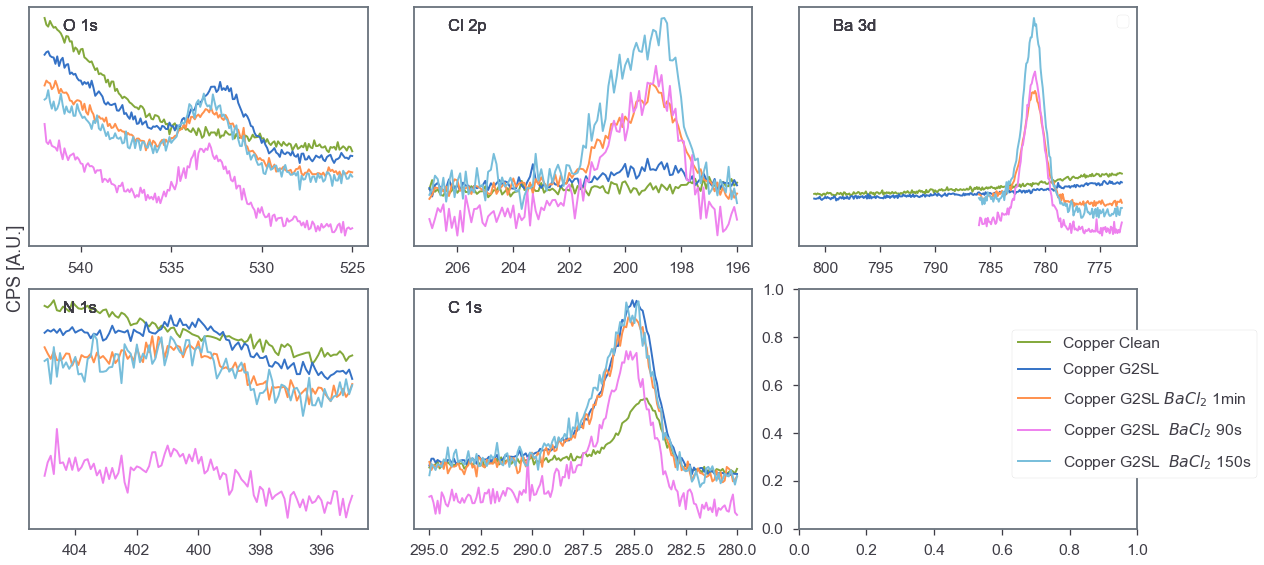

In [12]:
regs = ['O_1s', 'Cl_2p', 'Ba_3d', 'N_1s', 'C_1s'] 
plot_xp_regions(raw, regs, ncols=3);
plt.gca().set(xlabel = '')

## Plot a sigle region

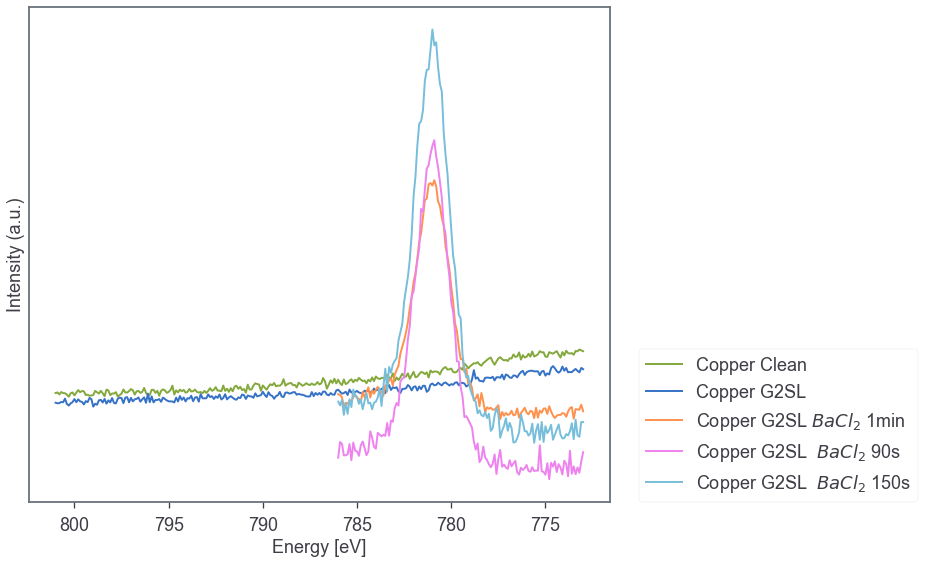

In [53]:
for xp in bg:
    plot_region(xp, 'Ba_3d')
#plt.gca().invert_xaxis()
plt.gca().set(yticks=[], ylabel='Intensity (a.u.)')
plt.legend(bbox_to_anchor=(1.05, 0), loc=3, borderaxespad=0)

# How Shirley and ASLS background works (comparation)

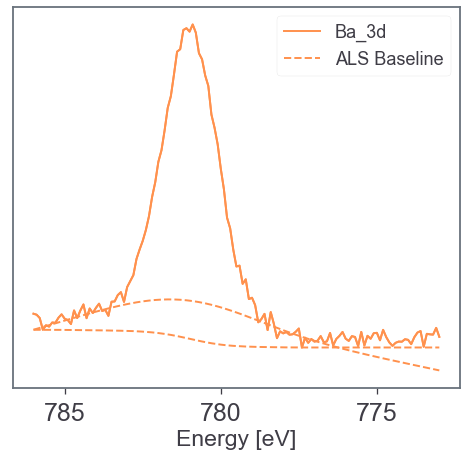

In [28]:
plt.figure(figsize=(8, 7))
subtract_als_bg(bg[2],regs[2])
subtract_shirley_bg(bg[2],regs[2])
plt.gca().set(yticks=[], ylabel=None)
plt.gca().invert_xaxis()
plt.rcParams['xtick.labelsize'] = 25
plt.rcParams['axes.labelsize'] = 23

# Import data with background corretion

In [54]:
path = 'C:\\Users\\USUARIO\\Desktop\\Adelina\\xps_sw-master\\data\\Cu_G2SL\\2022_08_29_G2SL\\'
files = glob.glob(path+'**/*.uxy')

files

['C:\\Users\\USUARIO\\Desktop\\Adelina\\xps_sw-master\\data\\Cu_G2SL\\2022_08_29_G2SL\\proc\\20220829_Cu_clean4.uxy',
 'C:\\Users\\USUARIO\\Desktop\\Adelina\\xps_sw-master\\data\\Cu_G2SL\\2022_08_29_G2SL\\proc\\20220830_Cu_G2SL_subl_7h30min.uxy',
 'C:\\Users\\USUARIO\\Desktop\\Adelina\\xps_sw-master\\data\\Cu_G2SL\\2022_08_29_G2SL\\proc\\20220830_Cu_G2SL_subl_7h30min_BaCl2_1min.uxy',
 'C:\\Users\\USUARIO\\Desktop\\Adelina\\xps_sw-master\\data\\Cu_G2SL\\2022_08_29_G2SL\\proc\\20220830_Cu_G2SL_subl_7h30min_BaCl2_90s.uxy',
 'C:\\Users\\USUARIO\\Desktop\\Adelina\\xps_sw-master\\data\\Cu_G2SL\\2022_08_29_G2SL\\proc\\20220901_Cu_G2SL_subl_7h30min_BaCl2_150s.uxy']

In [55]:
unscaled = [read_processed_xp(f) for f in files]

[Errno 2] No such file or directory: 'C:\\Users\\USUARIO\\Desktop\\Adelina\\xps_sw-master\\data\\Cu_G2SL\\2022_08_29_G2SL\\proc\\20220829_Cu_clean4.uxy.ft', returning empty fit dict


In [56]:
names = ['Copper Clean','Copper G2SL',  'Copper G2SL $BaCl_2$ 1min',  'Copper G2SL  $BaCl_2$ 90s',   'Copper G2SL  $BaCl_2$ 150s']
cols = ['g','b', 'y','violet','c']
for  c, n, xp in zip (cols, names,unscaled):
    xp.name = n
    xp.color = c

## Plot regions

[Text(0.5, 68.0, '')]

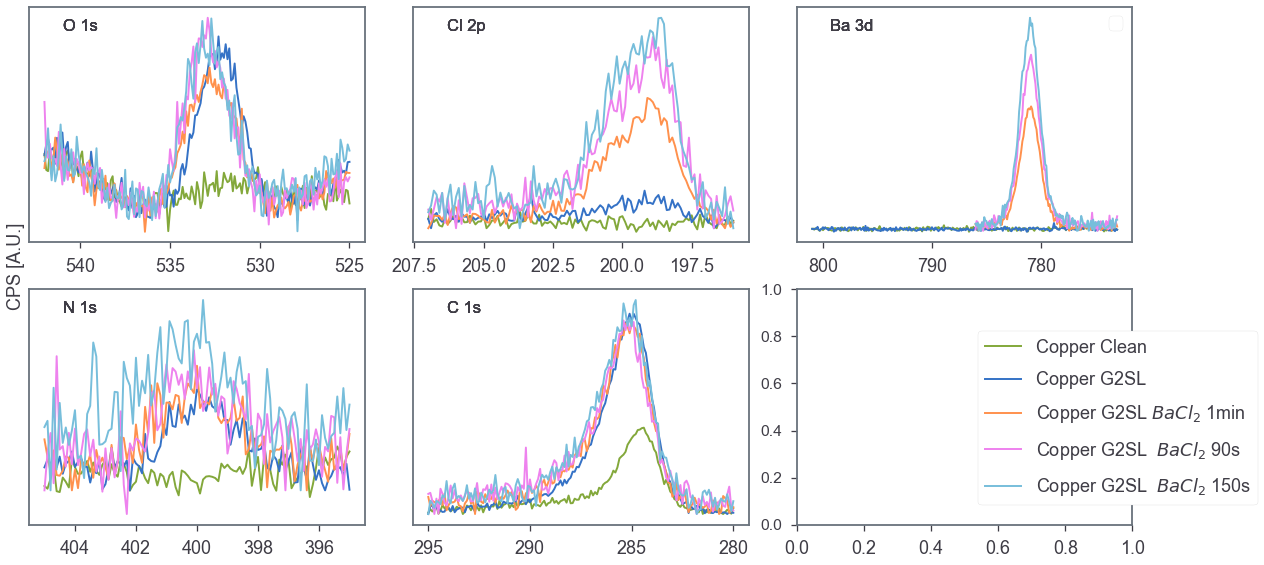

In [57]:
regs = [ 'O_1s', 'Cl_2p', 'Ba_3d', 'N_1s', 'C_1s']

plot_xp_regions(unscaled, regs, ncols=3);
plt.gca().set(xlabel = '')

### Tail correction

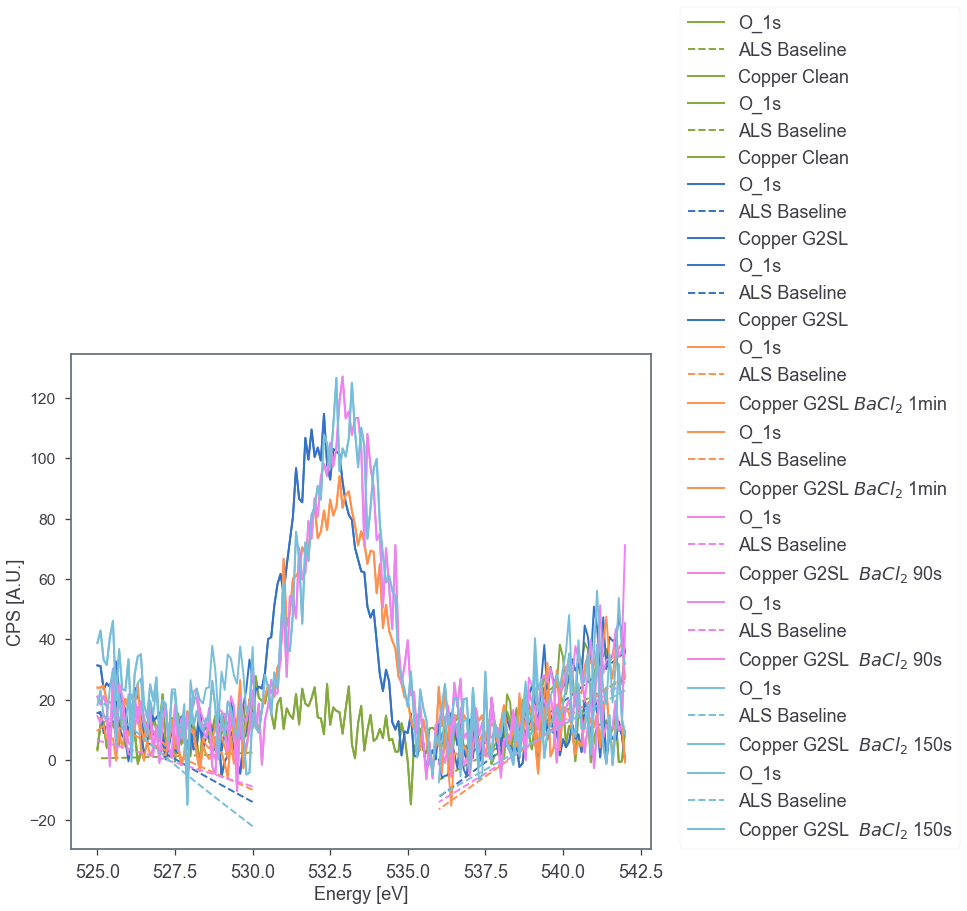

In [59]:
reg = 'O_1s'
for xp in unscaled[0:]:
    fix_tail_bg(xp, reg, edw=536, inplace = True)
    fix_tail_bg(xp, reg, eup=530, inplace = True)
plt.legend(bbox_to_anchor=(1.05, 0), loc=3, borderaxespad=0)

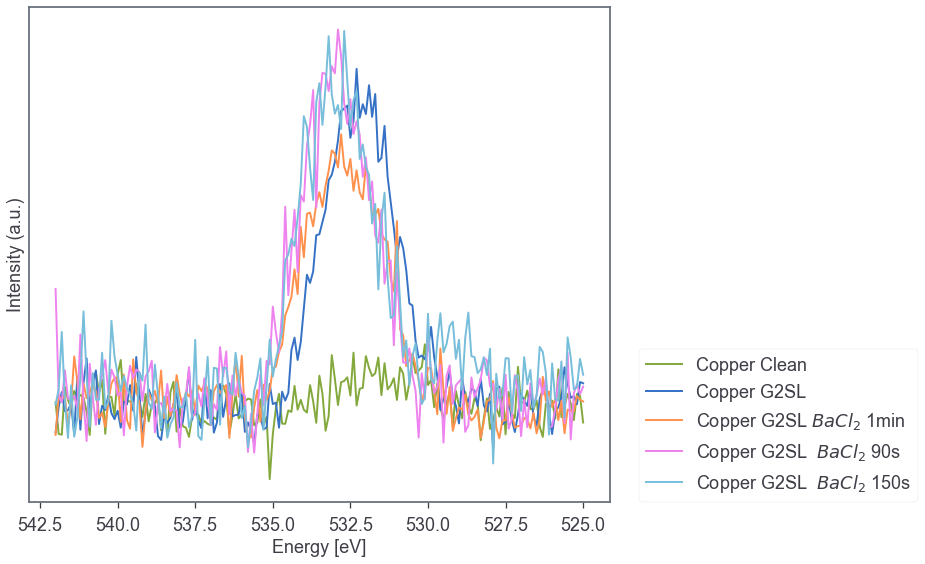

In [60]:
for xp in unscaled:
    plot_region(xp, 'O_1s')
#plt.gca().invert_xaxis()
plt.gca().set(yticks=[], ylabel='Intensity (a.u.)')
plt.legend(bbox_to_anchor=(1.05, 0), loc=3, borderaxespad=0)

## Subtract C 1s 

In [32]:
sub=[unscaled[0]]
for xp in unscaled[1:]:
    subscaled = subtract_ref_region(xp, unscaled[0], region='C_1s')
    sub.append(subscaled)

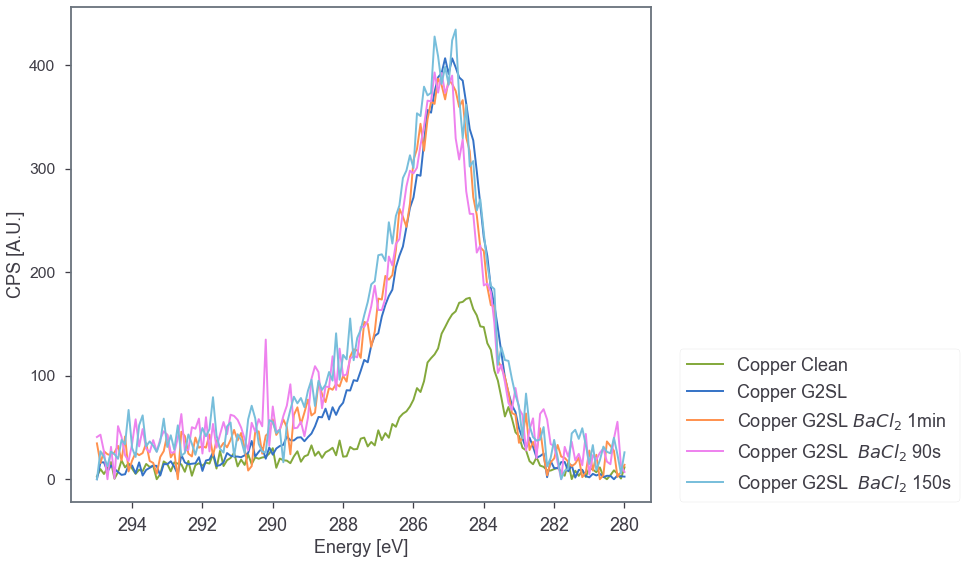

In [61]:
for xp in unscaled:
    plot_region(xp, 'C_1s')
plt.legend(bbox_to_anchor=(1.05, 0), loc=3, borderaxespad=0)

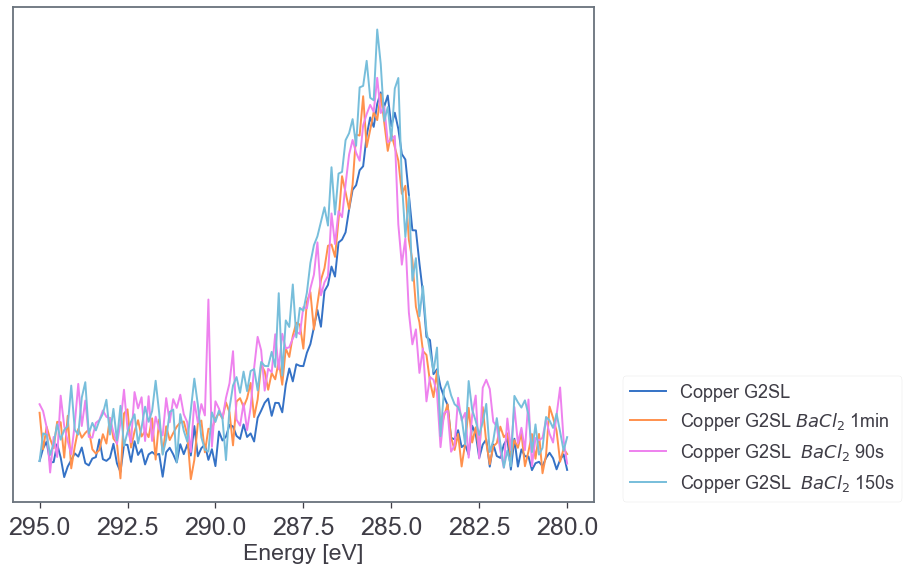

In [34]:
for xp in sub[1:]:
    plot_region(xp, 'C_1s_sub')
plt.gca().invert_xaxis()
plt.gca().set(yticks=[], ylabel=None)
plt.legend(bbox_to_anchor=(1.05, 0), loc=3, borderaxespad=0)

# Stoichiometry

## Areas calculation

'C_1s_sub' region does not exist in Copper Clean


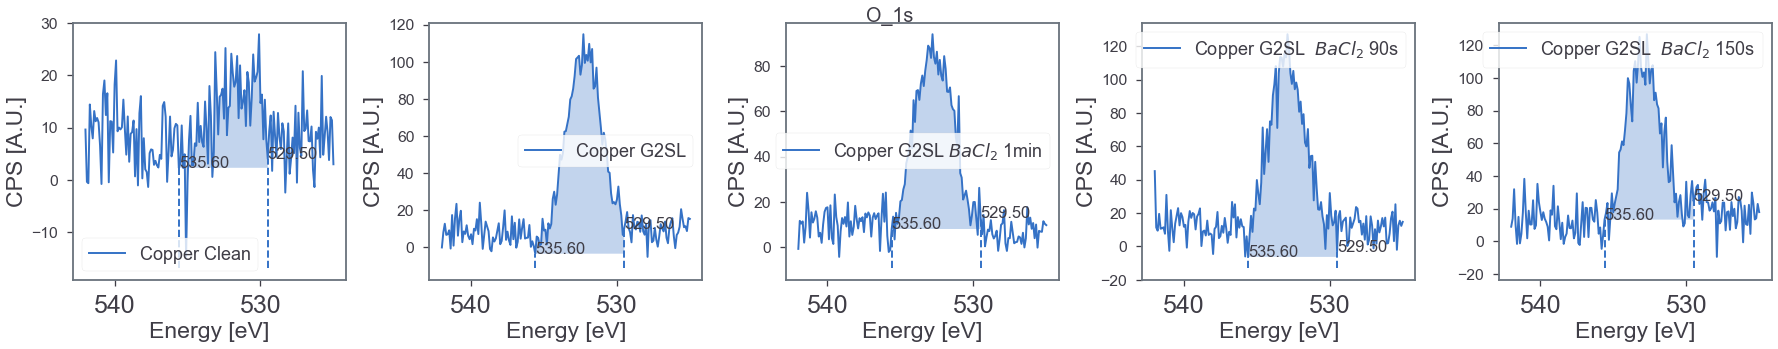

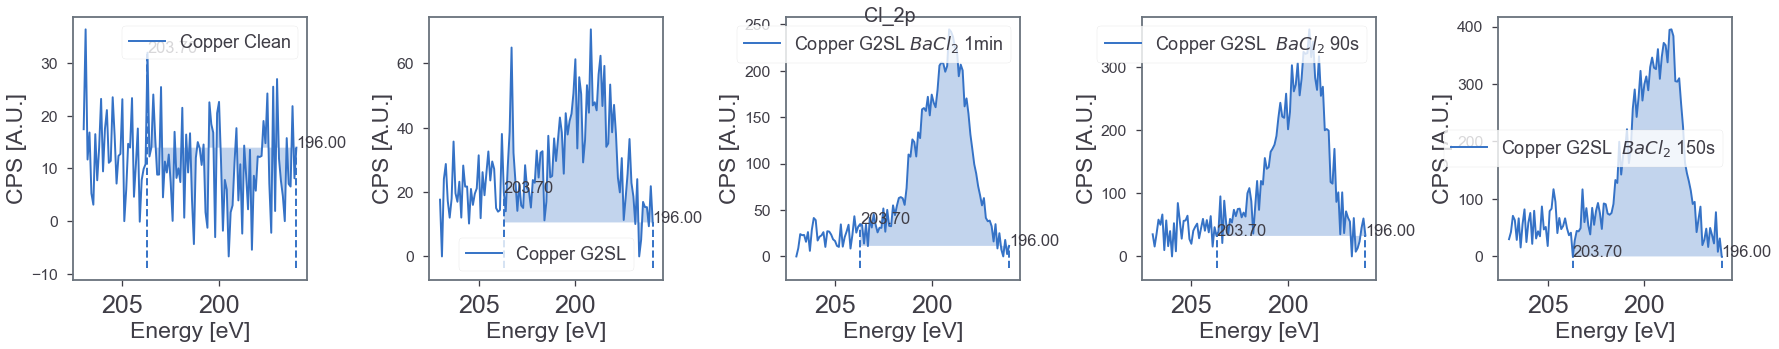

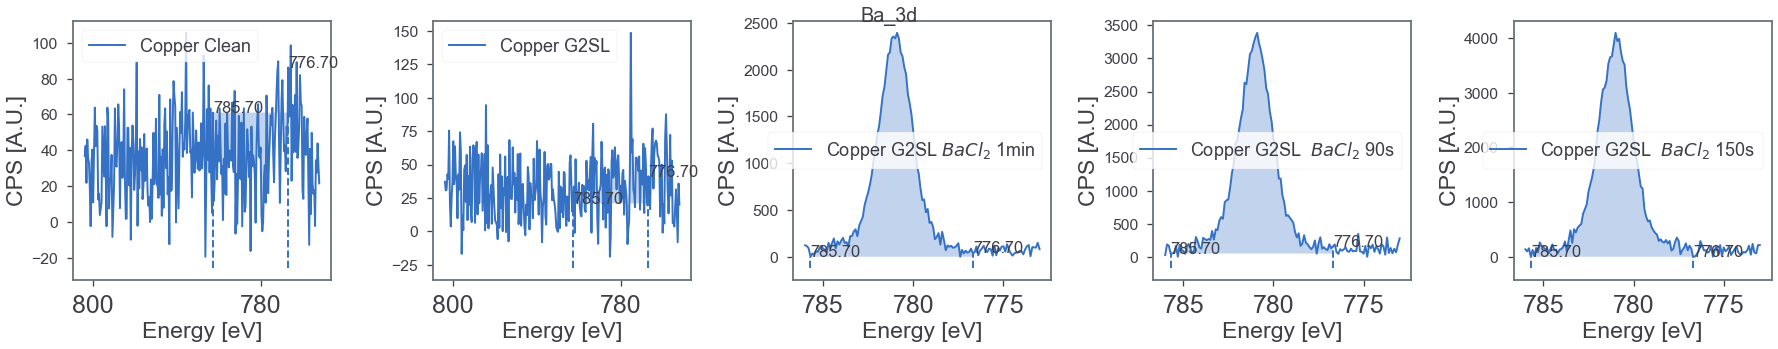

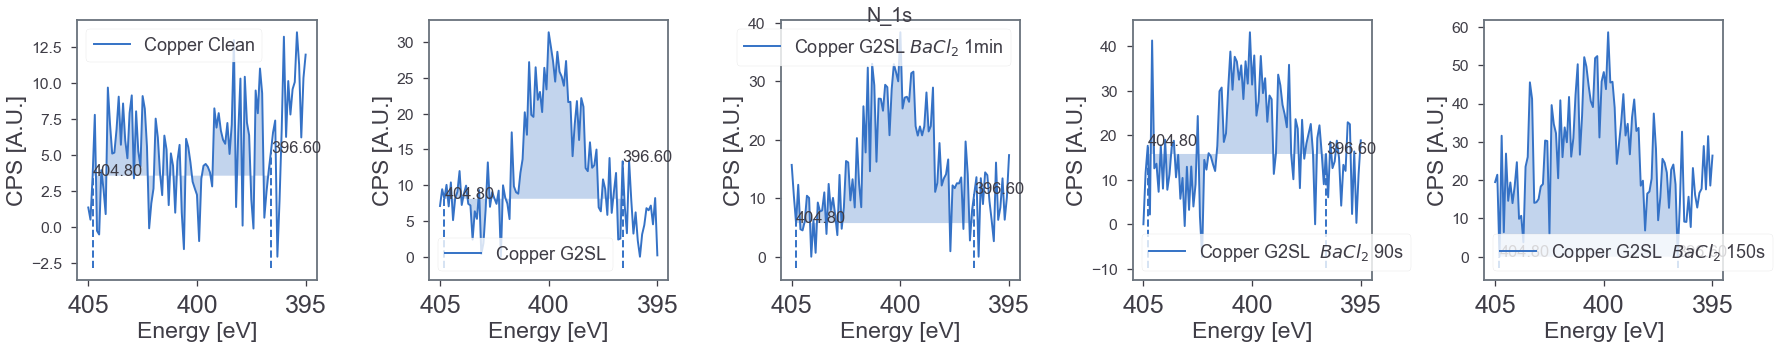

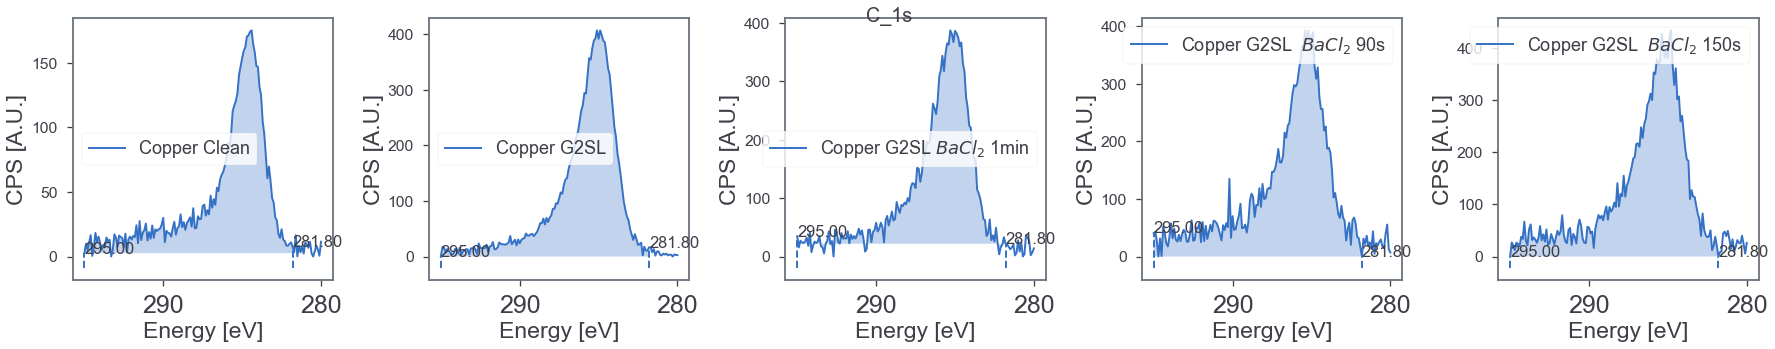

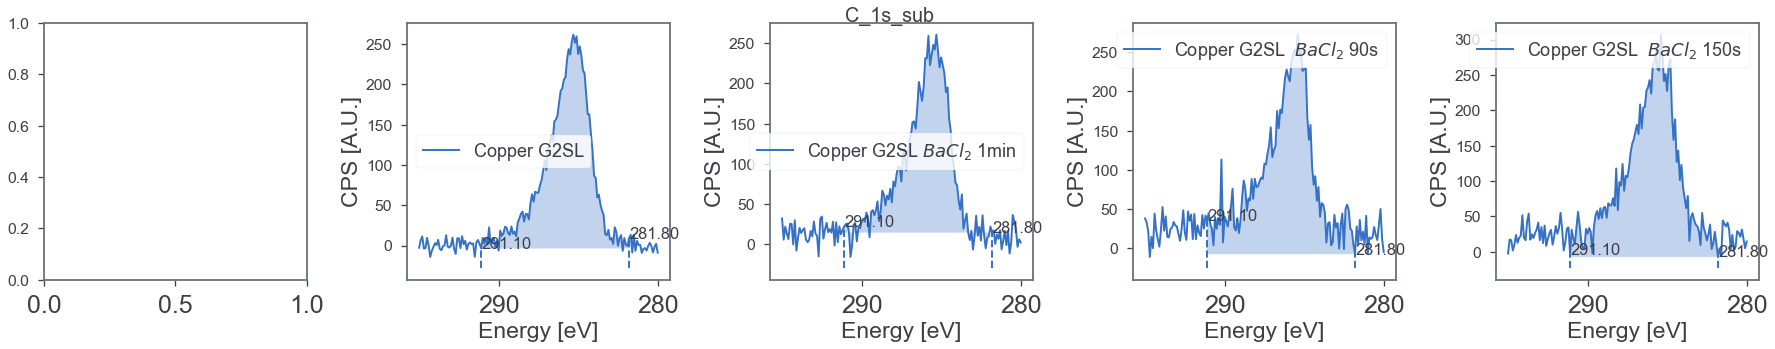

In [35]:
for r in regs + ['C_1s_sub']:
    integrateRegions(sub, r, asf=asf)

In [36]:
sub[1].area

{'O_1s': 451.87644593963546,
 'Cl_2p': 275.33823018002914,
 'Ba_3d': 43.02055291800713,
 'N_1s': 233.16360163958353,
 'C_1s': 4546.0110946430605,
 'C_1s_sub': 2544.284711134062}

## Ratios

In [62]:
a = {'C_1s': 12+6+6+5+2+1+3, 'C_1s_sub': 12+6+6+5+2+1+3, 'N_1s': 4, 'Si_2p': 1, 'O_1s': 9, 'Ba_3d': 1e-10, 'Cl_2p': 1e-10, 'G2': 1, 'Na_1s': 1e-10, 'Ru_3p': 1e-10}

stog2 = XPS_experiment(name='Sto. G2-SL', area=a) 

for xp in sub:
    xp.area['G2'] = xp.area['N_1s'] / 4
    #xp.area['G2'] = xp.area['C_1s']/35 #It can be calculated with carbon as a reference

num = ['C_1s_sub', 'C_1s_sub', 'O_1s']
denom = ['O_1s', 'N_1s', 'N_1s']
display_stoichiometry(sub[1:] + [stog2], num + ['Ba_3d'], denom + ['G2'])

# Coverage

In [63]:
inds = [[1, 2, 3, 4, 0]]
arrange_coverages(unscaled, inds, r_ml=1.1, region='Cu_2p', mfp=1.86, takeoff=10)

matrix([[0.45848607, 0.00173399],
        [0.85647306, 0.00348441],
        [0.99019749, 0.00415665],
        [1.09676062, 0.0071834 ]])

The online relaitable coverage is the first one in the matrix

# Oxygen Fits

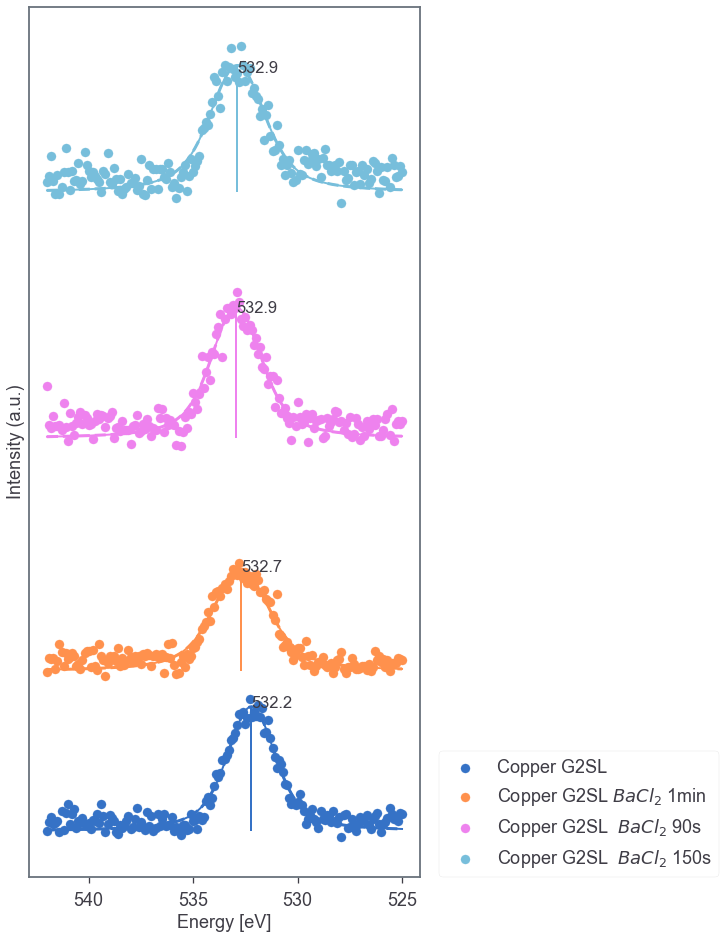

In [45]:
reg = 'O_1s'
plt.figure(figsize=(7,16))
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['legend.fontsize']= 18
for i, xp in enumerate(unscaled[1:]):
    xf = XPFit(xp, reg) # This function can do the simple Voigt
    xf.voigt()
    plot_fit_result(xp, reg, offset =6*i)
    plt.gca().set(yticks=[], ylabel=None)
    plt.gca().set(xlabel = 'Energy [eV]', ylabel = 'Intensity (a.u.)')
plt.legend(bbox_to_anchor=(1.05, 0), loc=3, borderaxespad=0)
plt.gca().invert_xaxis()


In [46]:
#To save the fit data
for xp in unscaled[1:]:
    store_fits(xp, xp.path)

Storing of file C:\Users\USUARIO\Desktop\Adelina\xps_sw-master\data\Cu_G2SL\2022_08_29_G2SL\proc\20220830_Cu_G2SL_subl_7h30min.uxy.ft successful
Storing of file C:\Users\USUARIO\Desktop\Adelina\xps_sw-master\data\Cu_G2SL\2022_08_29_G2SL\proc\20220830_Cu_G2SL_subl_7h30min_BaCl2_1min.uxy.ft successful
Storing of file C:\Users\USUARIO\Desktop\Adelina\xps_sw-master\data\Cu_G2SL\2022_08_29_G2SL\proc\20220830_Cu_G2SL_subl_7h30min_BaCl2_90s.uxy.ft successful
Storing of file C:\Users\USUARIO\Desktop\Adelina\xps_sw-master\data\Cu_G2SL\2022_08_29_G2SL\proc\20220901_Cu_G2SL_subl_7h30min_BaCl2_150s.uxy.ft successful


In [47]:
unscaled[1].fit['O_1s'] #To see the shi-square value

To calculate the Voigt components manually, we enter the parameters [(height), (centre), (width)], and their limits.

[Text(0.5, 0, 'Energy [eV]')]

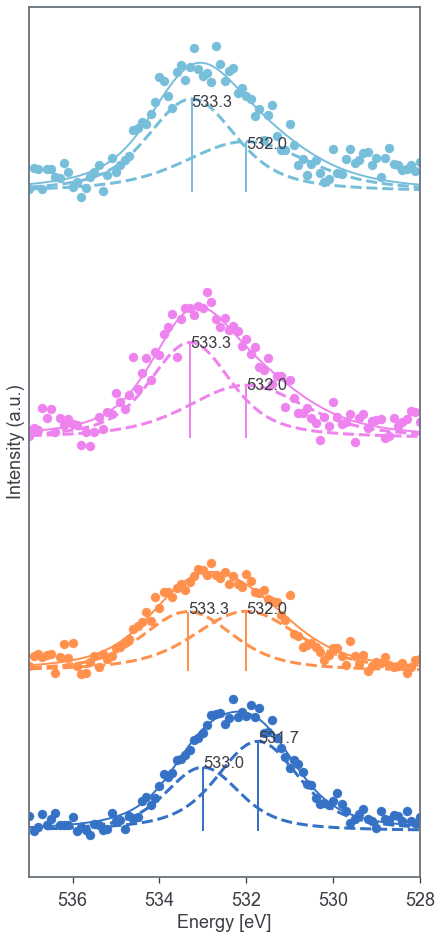

In [64]:
reg = 'O_1s'

# xp.color = 'b'
plt.figure(figsize=(7,16))
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['legend.fontsize']= 18
pars = [250, 530, 0.9] #[(height), (centre), (width)]
 #limits
bounds1 = [(150,300), (533, 532), (0.3,0.6)]
bounds2 = [(150,200), (532, 531), (0.5,0.8)]
bounds3 = [(150,200), (532, 531), (0.6,0.9)]
bounds4 = [(150,200), (532, 531), (0.7,0.95)]

bounds = [bounds1, bounds2, bounds3, bounds4]
for i, b in enumerate(bounds):
    xp = unscaled[1+i]
    xf = XPFit(xp, reg)
    xpfit = xf.voigt()    
    xf.add_voigt(pars, b, )
    plot_fit_result(xp, reg, offset=6*i)
plt.gca().set(xlim=(537,528))
plt.gca().set(yticks=[], ylabel='Intensity (a.u.)')
plt.gca().set(xlabel = 'Energy [eV]')